In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
city_df = pd.read_csv('./raw_data/city_data.csv')
ride_df = pd.read_csv('./raw_data/ride_data.csv')

city_ride_df = pd.merge(city_df, ride_df, on='city', how='left')
city_ride_df

fare_df = city_ride_df.groupby('city')
ave_fare_var = fare_df['fare'].mean()

num_ride_var = fare_df['city'].count()
num_ride_var

type_var = fare_df['type']

num_drive = fare_df['driver_count']
num_drive.max()

full_df = pd.DataFrame(
{
    "Average Fare ($)": ave_fare_var,
    "Total Number of Rides per City": num_ride_var,
    "Driver Count": num_drive.max(),
    "Type": type_var.max()
}
)
full_df

,Average Fare ($),Driver Count,Total Number of Rides per City,Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban
Arnoldview,25.106452,41,31,Urban
Campbellport,33.711333,26,15,Suburban
Carrollbury,36.606000,4,10,Suburban
Carrollfort,25.395517,55,29,Urban


In [64]:
#Gold, Light Sky Blue, and Light Coral
handles = ['Urban', 'Suburban', 'Rural']
plt.scatter(
    full_df['Total Number of Rides per City'][full_df["Type"] == 'Urban'], 
    full_df['Average Fare ($)'][full_df["Type"] == 'Urban'],
    s=full_df['Driver Count']*15,
    marker='o', 
    c='lightcoral',
    edgecolors='black',
    alpha=0.65,
    linewidth=1
)
plt.scatter(
    full_df['Total Number of Rides per City'][full_df["Type"] == 'Suburban'], 
    full_df['Average Fare ($)'][full_df["Type"] == 'Suburban'],
    s=full_df['Driver Count']*15,
    marker='o', 
    c='lightskyblue',
    edgecolors='black',
    alpha=0.65,
    linewidth=1
)
plt.scatter(
    full_df['Total Number of Rides per City'][full_df["Type"] == 'Rural'], 
    full_df['Average Fare ($)'][full_df["Type"] == 'Rural'],
    s=full_df['Driver Count']*15,
    marker='o', 
    c='gold',
    edgecolors='black',
    alpha=0.65,
    linewidth=1
)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(handles, loc="upper right")

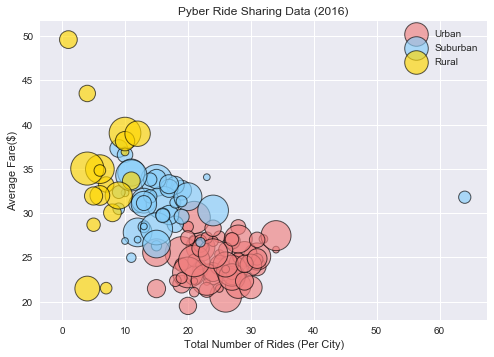

In [65]:
plt.show()

In [116]:
colors = ['lightskyblue', 'gold', 'lightcoral']
types = ['Rural', 'Suburban', 'Urban']
type_df = city_ride_df.groupby('type')
type_df.max()


,city,driver_count,date,fare,ride_id
type,,,,,
Rural,West Kevintown,10,2016-11-28 09:09:15,59.65,9985496304508
Suburban,Williamchester,27,2016-12-04 15:42:42,49.95,9976923455740
Urban,Zimmermanmouth,73,2016-12-05 01:52:05,44.99,9997901376574


In [117]:
type_df['fare'].sum()
#64669.12

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [118]:
type_df['driver_count'].sum()
#74958

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [119]:
type_df['city'].count()
#2407

type
Rural        125
Suburban     657
Urban       1625
Name: city, dtype: int64

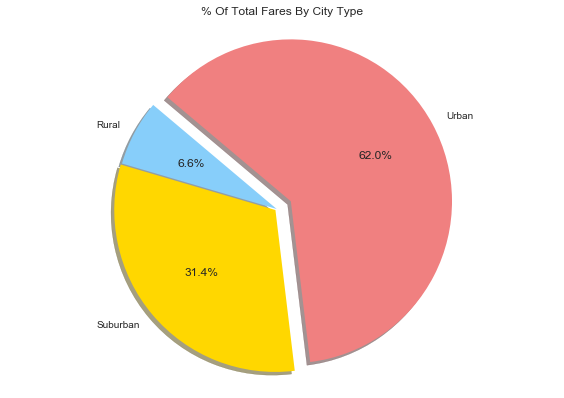

In [120]:
plt.pie(
    type_df['fare'].sum(),
    labels = types,
    shadow=True,
    colors=colors,
    explode=(0,.01,.1),
    autopct='%1.1f%%',
    startangle=140
)

plt.axis('equal')
plt.tight_layout()
plt.title('% Of Total Fares By City Type')

plt.show()



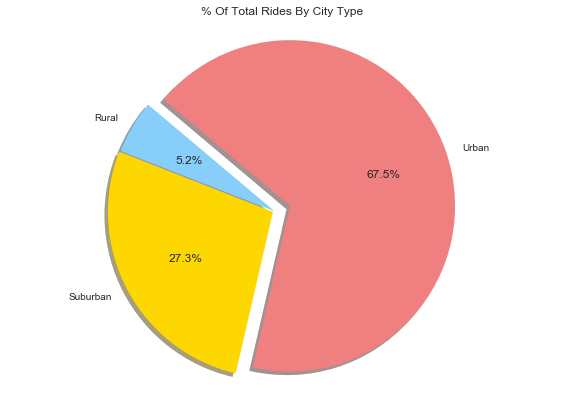

In [123]:
plt.pie(
    type_df['city'].count(),
    labels=type_df['type'].max(),
    shadow=True,
    colors=colors,
    explode=(0,.01,.1),
    autopct='%1.1f%%',
    startangle=140
)

plt.axis('equal')
plt.tight_layout()
plt.title('% Of Total Rides By City Type')

plt.show()

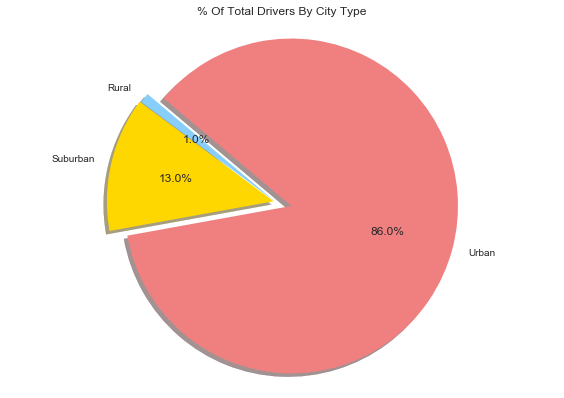

In [124]:
plt.pie(
    type_df['driver_count'].sum(),
    labels=type_df['type'].max(),
    shadow=True,
    colors=colors,
    explode=(0,.01,.1),
    autopct='%1.1f%%',
    startangle=140
)

plt.axis('equal')
plt.tight_layout()
plt.title('% Of Total Drivers By City Type')

plt.show()

In [125]:
#    Analysis
# 1. Average fares tend to be lower in urban areas where there are more drivers. Urban areas account for a significant portion of Pyber drivers and Pyber rides. 
# 2. The higher average fares occur in rural areas where there exist lower populations and longer distances covered by Pyber drivers.
# 3. 62% of fare revenue comes from Urban areas. All-in-all, Pyber's business relies signifantly on urban areas. The high driver counts with the highly populated nature of urban areas means there are more rides, more customers, and thus more revenue. 
#        The lower average revenue in urban areas can be explained in that Pyber drivers cover smaller distances in urban places and thus lead to lower average fares. 